<a href="https://colab.research.google.com/github/tjddyd2259/caba_nlp/blob/main/DL51_using_convnets_with_small_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd drive/MyDrive/caba2012_colab/dataset/

/content/drive/MyDrive/caba2012_colab/dataset


In [ ]:
!unzip cats_and_dogs_small.zip

Archive:  cats_and_dogs_small.zip
replace cats_and_dogs_small/test/cats/cat.1500.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!rm cats_and_dogs_small.zip

In [ ]:
!unzip cats_and_dogs.zip

In [ ]:
!rm cats_and_dogs.zip

In [ ]:
%cd /content

/content


In [5]:
import os, shutil

In [6]:
base_dir = './drive/MyDrive/caba2012_colab/dataset/cats_and_dogs_small'

# 훈련, 검증, 테스트 분할을 위한 디렉토리

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')
# 훈련용 고양이 사진 디렉토리
train_cats_dir = os.path.join(train_dir,'cats')
# 훈련용 강아지 사진 디렉토리
train_dogs_dir = os.path.join(train_dir,'dogs')
# 검증용 고양이 사진 디렉토리
validation_cats_dir = os.path.join(validation_dir,'cats')
# 검증용 강아지 사진 디렉토리
validation_dogs_dir = os.path.join(validation_dir,'dogs')
# 테스트용 고양이 사진 디렉토리
test_cats_dir = os.path.join(test_dir,'cats')
# 테스트용 강아지 사진 디렉토리
test_dogs_dir = os.path.join(test_dir,'dogs')

In [7]:
print('훈련용 고양이 이미지 전체 개수:',len(os.listdir(train_cats_dir)))

훈련용 고양이 이미지 전체 개수: 983


In [8]:
print(len(os.listdir(test_cats_dir)))

500


In [9]:
print(len(os.listdir(train_dogs_dir)))

982


In [17]:
import keras
keras.__version__

'2.4.3'

In [2]:
!pip uninstall keras
!pip uninstall tensorflow


Uninstalling Keras-2.3.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/Keras-2.3.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/docs/*
    /usr/local/lib/python3.7/dist-packages/keras/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/docs/md_autogen.py
    /usr/local/lib/python3.7/dist-packages/docs/update_docs.py
Proceed (y/n)? y
  Successfully uninstalled Keras-2.3.1
Uninstalling tensorflow-2.2.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.2.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.2.0


In [3]:
!pip install keras==2.3.1
!pip install tensorflow==2.2.0

  Using cached https://files.pythonhosted.org/packages/ad/fd/6bfe87920d7f4fd475acd28500a42482b6b84479832bdc0fe9e589a60ceb/Keras-2.3.1-py2.py3-none-any.whl
ERROR: fancyimpute 0.4.3 requires tensorflow, which is not installed.
  Using cached https://files.pythonhosted.org/packages/4c/1a/0d79814736cfecc825ab8094b39648cc9c46af7af1bae839928acb73b4dd/tensorflow-2.2.0-cp37-cp37m-manylinux2010_x86_64.whl


In [4]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [10]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',
                        input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [13]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer = optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [16]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 1965 images belonging to 2 classes.
Found 936 images belonging to 2 classes.


In [17]:
for data_batch, labels_batch in train_generator:
  print('배치 데이터 크기:',data_batch.shape)
  print('배치 레이블 크기:',labels_batch.shape)
  break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [18]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data = validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 493s 5s/step - loss: 0.6944 - acc: 0.5078 - val_loss: 0.6843 - val_acc: 0.6124
Epoch 2/30
100/100 [==============================] - 11s 107ms/step - loss: 0.6662 - acc: 0.5975 - val_loss: 0.6426 - val_acc: 0.6255
Epoch 3/30
100/100 [==============================] - 12s 116ms/step - loss: 0.6226 - acc: 0.6675 - val_loss: 0.5512 - val_acc: 0.6376
Epoch 4/30
100/100 [==============================] - 11s 108ms/step - loss: 0.5815 - acc: 0.6962 - val_loss: 0.6246 - val_acc: 0.6546
Epoch 5/30
100/100 [==============================] - 11s 107ms/step - loss: 0.5423 - acc: 0.7270 - val_loss: 0.6009 - val_acc: 0.6837
Epoch 6/30
100/100 [==============================] - 11s 108ms/step - loss: 0.5178 - acc: 0.7370 - val_loss: 0.5409 - val_acc: 0.6817
Epoch 7/30
100/100 [==============================] - 11s 110ms/step - loss: 0.4821 - acc: 0.7592 - val_loss: 0.7777 - val_acc: 0.6767
Epoch 8/30
100/100 [==============================] - 11s

In [20]:
# 모델 저장
model.save('drive/MyDrive/caba2012_colab/cats_and_dogs_small_1.h5')

In [21]:
# 모델 불러오기
from keras.models import load_model
model = load_model('drive/MyDrive/caba2012_colab/cats_and_dogs_small_1.h5')

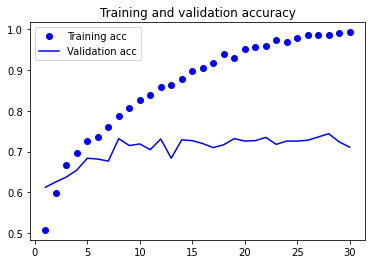

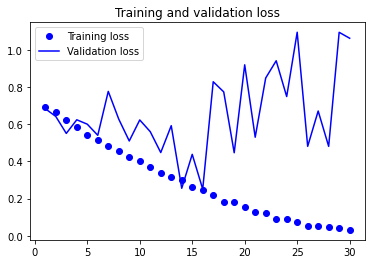

In [22]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

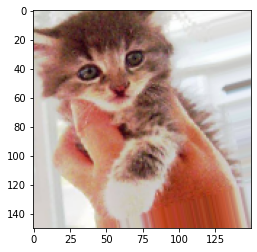

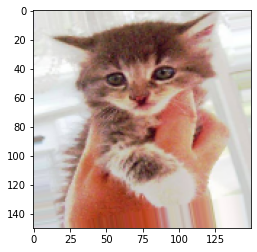

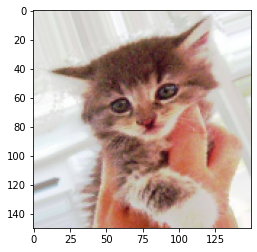

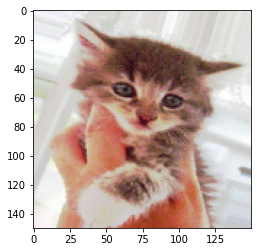

In [27]:
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)
x = x.reshape((1,)+ x.shape)

i=0
for batch in datagen.flow(x,batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i +=1
  if i % 4 == 0 :
    break
plt.show()

In [28]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',
                        input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer =optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


In [29]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode = 'binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Found 1965 images belonging to 2 classes.
Found 936 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 33s 329ms/step - loss: 0.6919 - acc: 0.5085 - val_loss: 0.6922 - val_acc: 0.5831
Epoch 2/100
100/100 [==============================] - 29s 292ms/step - loss: 0.6763 - acc: 0.5655 - val_loss: 0.7210 - val_acc: 0.6134
Epoch 3/100
100/100 [==============================] - 29s 295ms/step - loss: 0.6602 - acc: 0.5923 - val_loss: 0.5318 - val_acc: 0.6179
Epoch 4/100
100/100 [==============================] - 29s 293ms/step - loss: 0.6475 - acc: 0.6164 - val_loss: 0.6988 - val_acc: 0.6250
Epoch 5/100
100/100 [==============================] - 30s 296ms/step - loss: 0.6300 - acc: 0.6401 - val_loss: 0.5377 - val_acc: 0.6237
Epoch 6/100
100/100 [==============================] - 29s 288ms/step - loss: 0.6149 - acc: 0.6507 - val_loss: 0.6039 - val_acc: 0.6849
Epoch 7/100
100/100 [==============================] - 30s 300ms/step - loss: 0.6020 - acc: 0.6696 - 

In [30]:
model.save('drive/MyDrive/caba2012_colab/cats_and_dogs_small_2.h5')

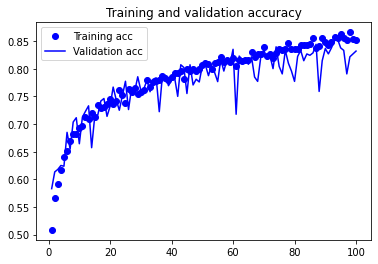

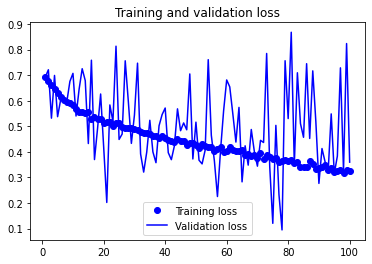

In [31]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()